In [4]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import altair as alt 
from sklearn.cluster import KMeans
df=pd.read_csv("data_14.csv")
df

,water_level,precipitation,temperature,humidity,visibility,wind,weather,pressure,fire,wl_change,temp_change,pressure_change
0,468.0,0.0,24.9,31.0,100.0,4.0,0.0,993.8,4.0,-3.0,-0.3,-0.4
1,140.0,0.0,27.9,22.0,20.0,1.0,0.0,1004.1,4.0,-2.0,0.6,-1.0
2,464.0,0.0,25.6,28.0,20.0,2.0,1.0,1001.2,4.0,-7.0,-1.8,-0.3
3,467.0,0.0,26.7,26.0,100.0,3.0,0.0,992.3,4.0,-1.0,1.2,-1.3
4,138.0,0.0,29.1,22.0,20.0,1.0,0.0,1001.3,4.0,-2.0,2.5,-1.3
...,...,...,...,...,...,...,...,...,...,...,...,...
1434,474.0,0.1,6.4,95.0,4.0,1.0,3.0,999.9,4.0,-1.0,5.9,1.5
1435,65.0,0.0,6.4,93.0,10.0,4.0,3.0,983.9,4.0,-1.0,5.2,3.1
1436,159.0,0.1,8.5,83.0,10.0,2.0,1.0,969.7,4.0,1.0,1.4,1.9
1437,99.0,0.1,7.5,91.0,10.0,3.0,3.0,995.4,4.0,-4.0,2.7,1.7


In [4]:
pd.set_option('display.max_columns',None)
pd.options.display.max_rows

60

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   water_level      1439 non-null   float64
 1   precipitation    1439 non-null   float64
 2   temperature      1439 non-null   float64
 3   humidity         1439 non-null   float64
 4   visibility       1439 non-null   float64
 5   wind             1439 non-null   float64
 6   weather          1439 non-null   float64
 7   pressure         1439 non-null   float64
 8   fire             1439 non-null   float64
 9   wl_change        1439 non-null   float64
 10  temp_change      1439 non-null   float64
 11  pressure_change  1439 non-null   float64
dtypes: float64(12)
memory usage: 135.0 KB


# Előfeldolgozás

In [6]:
df

,water_level,precipitation,temperature,humidity,visibility,wind,weather,pressure,fire,wl_change,temp_change,pressure_change
0,468.0,0.0,24.9,31.0,100.0,4.0,0.0,993.8,4.0,-3.0,-0.3,-0.4
1,140.0,0.0,27.9,22.0,20.0,1.0,0.0,1004.1,4.0,-2.0,0.6,-1.0
2,464.0,0.0,25.6,28.0,20.0,2.0,1.0,1001.2,4.0,-7.0,-1.8,-0.3
3,467.0,0.0,26.7,26.0,100.0,3.0,0.0,992.3,4.0,-1.0,1.2,-1.3
4,138.0,0.0,29.1,22.0,20.0,1.0,0.0,1001.3,4.0,-2.0,2.5,-1.3
...,...,...,...,...,...,...,...,...,...,...,...,...
1434,474.0,0.1,6.4,95.0,4.0,1.0,3.0,999.9,4.0,-1.0,5.9,1.5
1435,65.0,0.0,6.4,93.0,10.0,4.0,3.0,983.9,4.0,-1.0,5.2,3.1
1436,159.0,0.1,8.5,83.0,10.0,2.0,1.0,969.7,4.0,1.0,1.4,1.9
1437,99.0,0.1,7.5,91.0,10.0,3.0,3.0,995.4,4.0,-4.0,2.7,1.7


In [7]:
#szűrőfeltételek
filter=df.water_level>=0 #változó neve=adathalmaz neve.oszlop operátor operandus
#df[filter]
filter2=df.temperature>0
#df[filter2]
filt= filter & filter2
#df[filt]
df=df[filt]
df

,water_level,precipitation,temperature,humidity,visibility,wind,weather,pressure,fire,wl_change,temp_change,pressure_change
0,468.0,0.0,24.9,31.0,100.0,4.0,0.0,993.8,4.0,-3.0,-0.3,-0.4
1,140.0,0.0,27.9,22.0,20.0,1.0,0.0,1004.1,4.0,-2.0,0.6,-1.0
2,464.0,0.0,25.6,28.0,20.0,2.0,1.0,1001.2,4.0,-7.0,-1.8,-0.3
3,467.0,0.0,26.7,26.0,100.0,3.0,0.0,992.3,4.0,-1.0,1.2,-1.3
4,138.0,0.0,29.1,22.0,20.0,1.0,0.0,1001.3,4.0,-2.0,2.5,-1.3
...,...,...,...,...,...,...,...,...,...,...,...,...
1434,474.0,0.1,6.4,95.0,4.0,1.0,3.0,999.9,4.0,-1.0,5.9,1.5
1435,65.0,0.0,6.4,93.0,10.0,4.0,3.0,983.9,4.0,-1.0,5.2,3.1
1436,159.0,0.1,8.5,83.0,10.0,2.0,1.0,969.7,4.0,1.0,1.4,1.9
1437,99.0,0.1,7.5,91.0,10.0,3.0,3.0,995.4,4.0,-4.0,2.7,1.7


# Vizualizáció (A3)

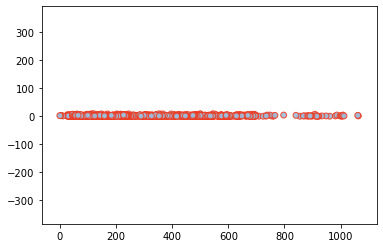

In [8]:
fig, ax = plt.subplots()

x = df.water_level
y = df.weather

for x,y in zip(x,y): 
    ax.add_patch(plt.Circle((x, y), 10.5, edgecolor = "#f03b20",facecolor='#9ebcda', alpha=0.9))


#Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='datalim')
ax.set_xbound(8, 9)

ax.plot()   #Causes an autoscale update.
plt.show()

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


Text(0, 0.5, 'Vízhőmérséklet')

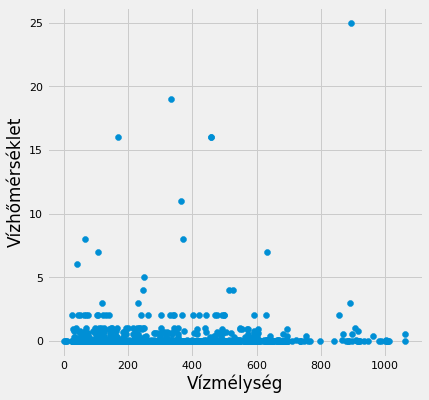

In [9]:
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

# Plotolás
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('Vízmélység')
plt.ylabel('Vízhőmérséklet')
#plt.title('Klaszter');

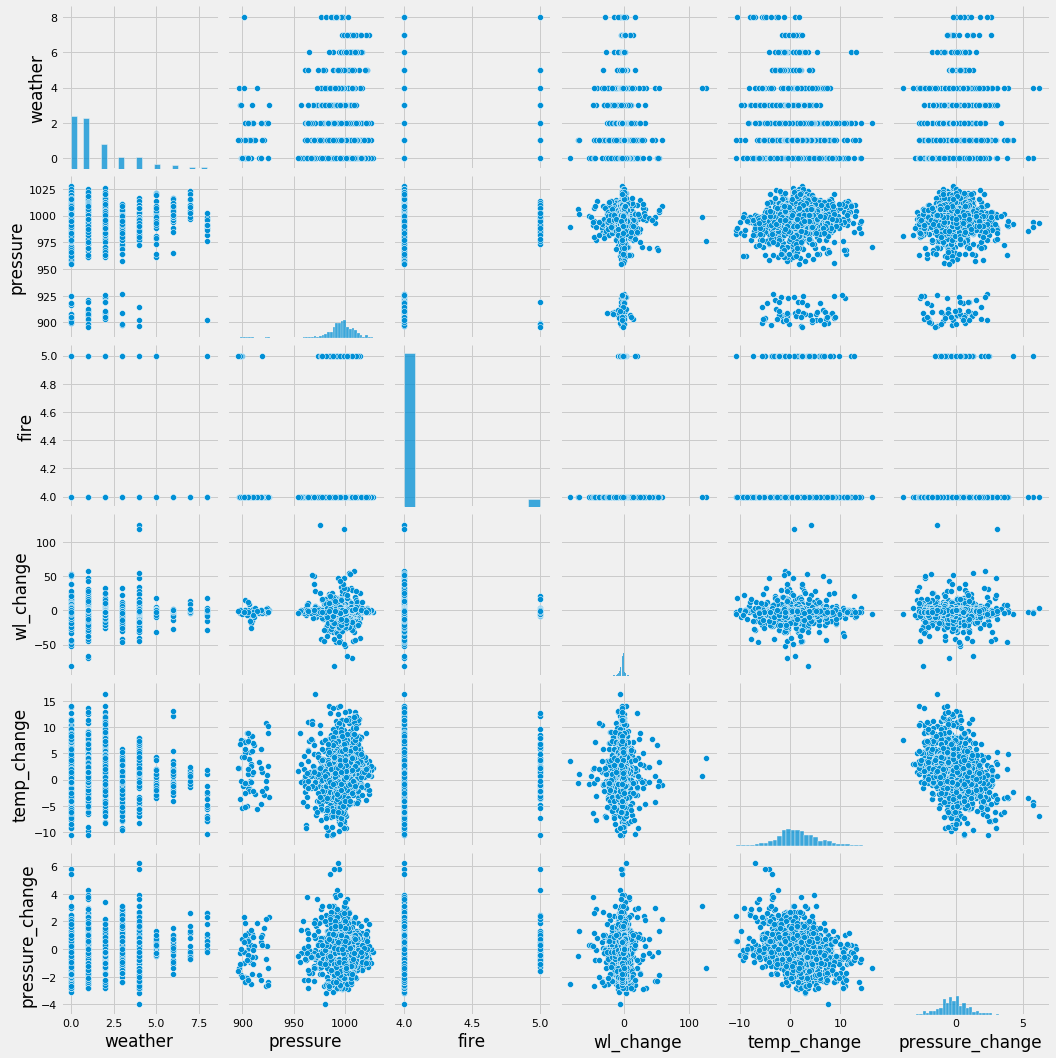

In [10]:
sns.pairplot(data=df.loc[:,'weather':])

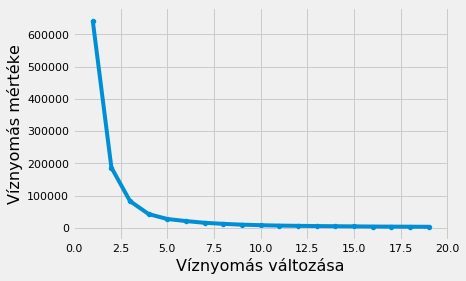

In [11]:
err = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['pressure','pressure_change']]);
    err.append([kmeans.n_clusters, kmeans.inertia_])

err = np.asarray(err)
plt.xlabel('Víznyomás változása', size = 16)
plt.ylabel('Víznyomás mértéke', size = 16)
sns.lineplot(err[:,0], err[:,1])
sns.scatterplot(err[:,0], err[:,1]);

Text(0, 0.5, 'Hőmérséklet változás')

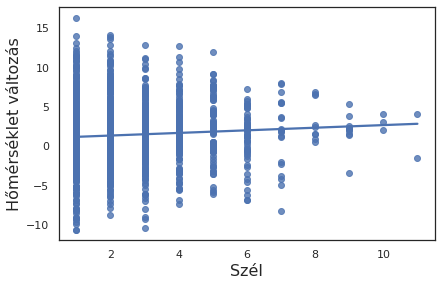

In [12]:
sns.set(style = 'white')
sns.regplot(data=df, x="wind", y="temp_change", ci = None)
plt.xlabel('Szél', size = 16)
plt.ylabel('Hőmérséklet változás', size = 16)
#plt.title("City bike score and overall traffic level", size = 20, weight = 'bold')

# Regresszió (B)

Lineáris regresszió

In [13]:
from sklearn.linear_model import LinearRegression
X = df[['pressure']].to_numpy()
X[:10]

array([[ 993.8],
       [1004.1],
       [1001.2],
       [ 992.3],
       [1001.3],
       [ 999.9],
       [ 987.3],
       [ 996.6],
       [ 987.3],
       [ 996.6]])

In [14]:
y = df['pressure_change'].to_numpy()
y[:10]

array([-0.4, -1. , -0.3, -1.3, -1.3, -0.7,  1.3,  2.6,  1.3,  2.6])

In [15]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
reg.coef_

array([0.00217281])

In [17]:
reg.intercept_

-2.2714198542355146

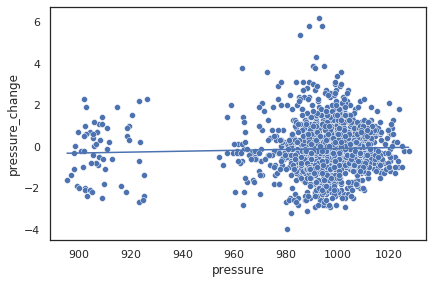

In [18]:
theta0 = reg.intercept_
theta1 = reg.coef_[0]
h = theta0 + theta1 * df['pressure']
sns.scatterplot(df['pressure'],df['pressure_change'])
sns.lineplot(df['pressure'],h)

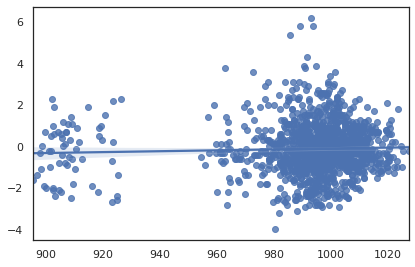

In [19]:
sns.regplot(X,y)

Második lineáris regresszió

In [20]:
X = df[['temperature']].to_numpy()
X[:15]

array([[24.9],
       [27.9],
       [25.6],
       [26.7],
       [29.1],
       [27.2],
       [21. ],
       [18.2],
       [21. ],
       [18.2],
       [24.7],
       [24.9],
       [29. ],
       [20.2],
       [16.6]])

In [21]:
y = df['temp_change'].to_numpy()
y[:15]

array([-0.3,  0.6, -1.8,  1.2,  2.5, -0.8,  1.6, -8. ,  1.6, -8. ,  1.1,
        0.7,  1. , -5.6,  6. ])

In [22]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
reg.coef_

array([0.16255578])

In [24]:
reg.intercept_

-0.9314052360346456

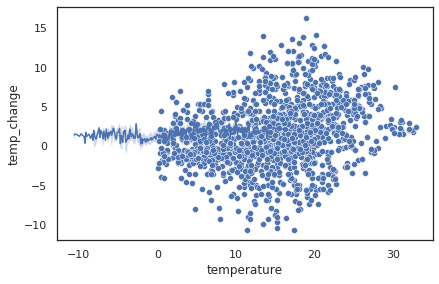

In [25]:
theta0 = reg.intercept_
theta1 = reg.coef_[0]
h = theta0 + theta1 * df['temperature']
sns.scatterplot(df['temperature'],df['temp_change'])
sns.lineplot(df['temp_change'],h)

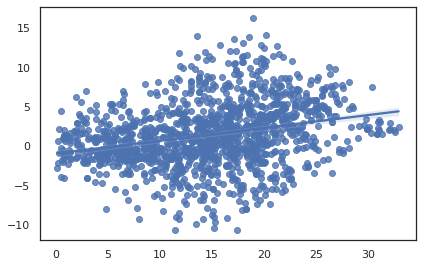

In [26]:
sns.regplot(X,y)

Logisztikus regresszió

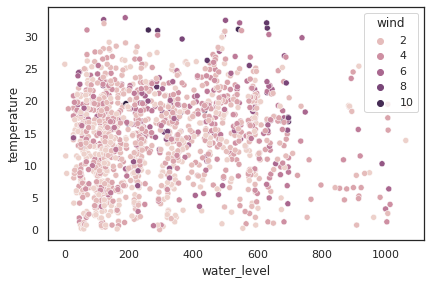

In [48]:
import sklearn
sns.scatterplot(df['water_level'],df['temperature'],hue=df['wind'])

In [31]:
from sklearn.linear_model import LogisticRegression

In [49]:
X = df[['water_level','temperature']].to_numpy()
X[:10]

array([[468. ,  24.9],
       [140. ,  27.9],
       [464. ,  25.6],
       [467. ,  26.7],
       [138. ,  29.1],
       [461. ,  27.2],
       [459. ,  21. ],
       [500. ,  18.2],
       [459. ,  21. ],
       [500. ,  18.2]])

In [50]:
y = df['wind'].to_numpy()
y[:10]

array([4., 1., 2., 3., 1., 3., 1., 1., 1., 1.])

In [51]:
reg = LogisticRegression()
reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
reg.coef_

array([[-1.65037665e-03, -5.04242286e-02],
       [-6.50047402e-04,  1.33080963e-03],
       [ 7.66195153e-04,  5.01393004e-04],
       [ 5.60162198e-04,  1.14669158e-02],
       [ 1.09202122e-03,  1.74014148e-02],
       [ 1.67459385e-03,  3.16210934e-02],
       [-4.01086440e-04,  1.11499808e-02],
       [-1.44864567e-04, -2.56732760e-02],
       [-1.19717604e-04,  2.21095131e-02],
       [-3.73158530e-03, -4.88169534e-02],
       [-3.60974555e-03, -1.65956775e-01]])

In [53]:
reg.intercept_

array([ 0.27779971, -0.77734245, -1.6837232 , -2.40363577, -3.31932083,
       -4.15849136, -4.07179549, -4.22861437, -4.81669345, -3.76778047,
       -2.98185321])